In [34]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
nx = 41
ny = 41
nt = 500
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 1.2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 1.2
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 1.2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 1.2

<ipython-input-46-eba76f9cdc33>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


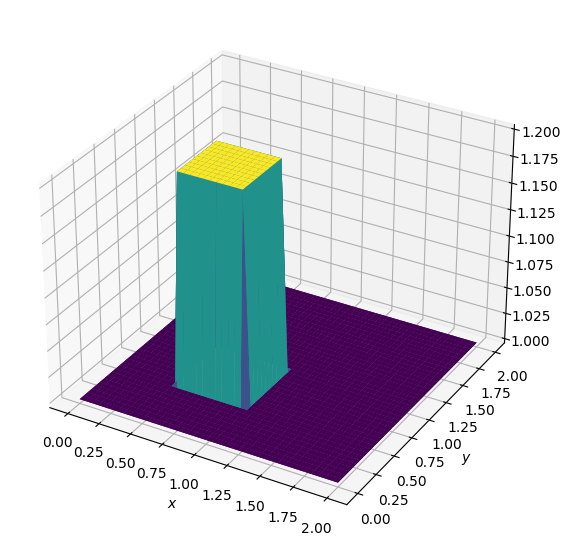

In [46]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [37]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

<ipython-input-38-0b86b413ee10>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


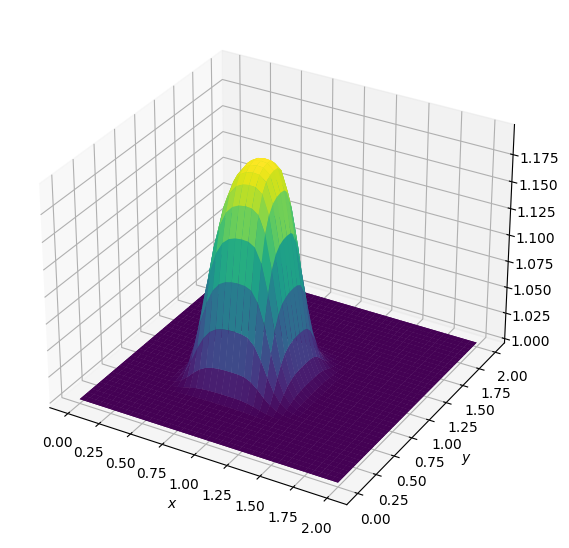

In [38]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');